# 10

## 1.Cleaning Data of housing and salaries data sets


In [ ]:
import pandas as pd

# Load the datasets
housing_df = pd.read_csv('/content/housingNoisy.csv')
salaries_df = pd.read_csv('/content/salariesNoisy.csv')


In [ ]:
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600,NEAR BAY
1,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600,NEAR BAY
2,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500,NEAR BAY
3,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100,NEAR BAY
4,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300,NEAR BAY


In [ ]:
salaries_df.head()

,0,male,full,25,doctorate,35,36350
0,1,male,full,13,doctorate,22.0,35350.0
1,2,male,full,10,doctorate,23.0,28200.0
2,3,female,full,7,NONE,27.0,26775.0
3,4,male,full,19,masters,30.0,33696.0
4,5,Any,full,16,doctorate,21.0,NaN


In [ ]:
# Display the shape of each DataFrame
print("housing_df DataFrame Shape:", housing_df.shape)
print("housing_df duplicated ",housing_df.duplicated().sum())
print("salaries_df DataFrame Shape:", salaries_df.shape)
print("salaries_df duplicated", salaries_df.duplicated().sum())

housing_df DataFrame Shape: (191, 10)
housing_df duplicated  1
salaries_df DataFrame Shape: (52, 7)
salaries_df duplicated 0


In [ ]:
# Drop duplicates
housing_df.drop_duplicates(inplace=True)
salaries_df.drop_duplicates(inplace=True)



In [ ]:
housing_df.isna().sum()* 100 / len(housing_df)


,0
longitude,1.052632
latitude,1.052632
housing_median_age,0.526316
total_rooms,1.578947
total_bedrooms,0.526316
population,1.052632
households,2.631579
median_income,1.052632
median_house_value,0.000000
ocean_proximity,3.157895


In [ ]:
salaries_df.isna().sum()* 100 / len(salaries_df)


,0
0,0.000000
male,0.000000
full,1.923077
25,0.000000
doctorate,1.923077
35,1.923077
36350,3.846154


In [ ]:
# Drop rows with any null values in housing_df and salaries_df
housing_df.dropna(inplace=True)
salaries_df.dropna(inplace=True)

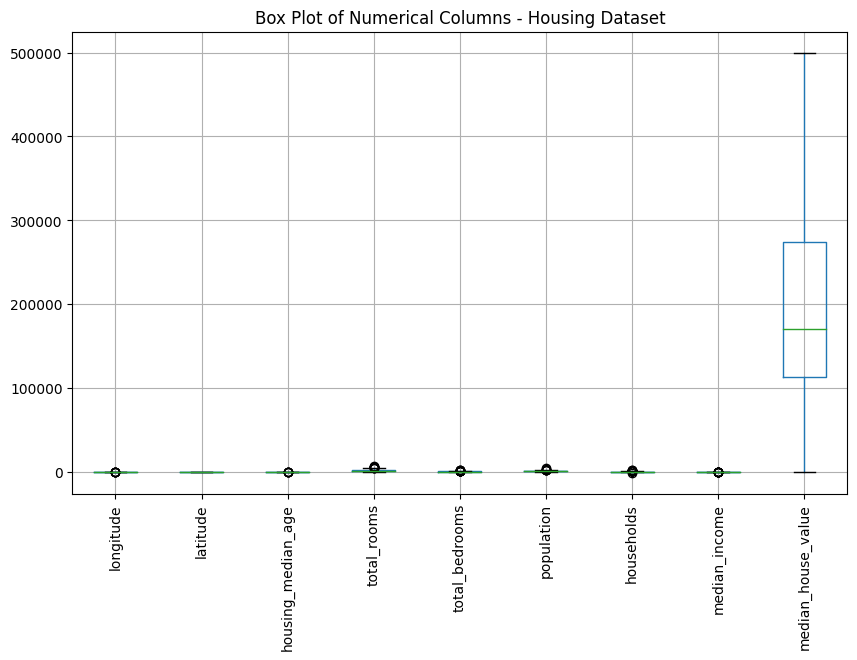

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Plotting boxplots for numerical columns in housing_df
housing_numerical_cols = housing_df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 6))
housing_numerical_cols.boxplot()
plt.title('Box Plot of Numerical Columns - Housing Dataset')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.show()




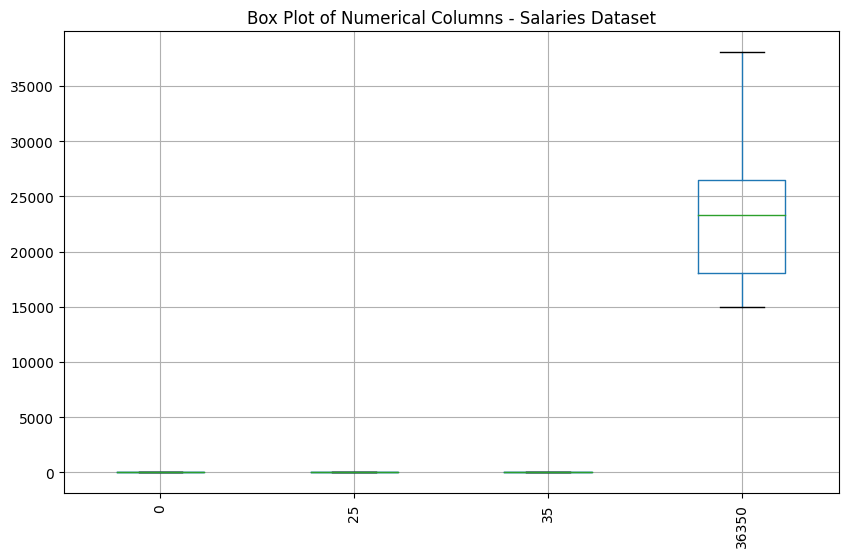

In [ ]:
# Plotting boxplots for numerical columns in salaries_df
salaries_numerical_cols = salaries_df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 6))
salaries_numerical_cols.boxplot()
plt.title('Box Plot of Numerical Columns - Salaries Dataset')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.show()

In [ ]:
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600,NEAR BAY
2,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500,NEAR BAY
3,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100,NEAR BAY
4,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300,NEAR BAY
5,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200,NEAR BAY


In [ ]:

zero_values = (housing_df.select_dtypes(include=['float64', 'int64']) == 0).sum()

print("Count of zeros in each numerical column:")
print(zero_values)

zero_rows = housing_df[(housing_df.select_dtypes(include=['float64', 'int64']) == 0).any(axis=1)]
print("\nRows containing zeros:")
print(zero_rows)

Count of zeros in each numerical column:
longitude             1
latitude              0
housing_median_age    2
total_rooms           1
total_bedrooms        1
population            1
households            1
median_income         1
median_house_value    1
dtype: int64

Rows containing zeros:
     longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
13     -122.26     37.85               -52.0       2491.0             0.0   
17     -122.27     37.85                52.0          0.0           347.0   
19     -122.26     37.84                 0.0       2239.0           455.0   
29     -122.28     37.84                50.0       2082.0           492.0   
40     -122.26     37.83                52.0       2432.0           715.0   
48     -122.27     37.82                43.0       1007.0           312.0   
69     -122.30     37.81                52.0        572.0           109.0   
116       0.00     37.83                52.0       1279.0           287.0   
161    -122.2

In [ ]:
for column in housing_df.select_dtypes(include=['float64', 'int64']):
    column_mean = housing_df[column].mean()
    housing_df[column] = housing_df[column].replace(0, column_mean)

# Display the modified DataFrame
print("Data after filling zeros with the mean:")
print(housing_df.head())

Data after filling zeros with the mean:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
2    -122.22     37.86                21.0       7099.0          1106.0   
3    -122.24     37.85                52.0       1467.0           190.0   
4    -122.25     37.85                52.0       1274.0           235.0   
5    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
2      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
3       496.0       177.0         7.2574            352100.0        NEAR BAY  
4       558.0       219.0         5.6431            341300.0        NEAR BAY  
5       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [ ]:
salaries_df.head()

,0,male,full,25,doctorate,35,36350
0,1,male,full,13,doctorate,22.0,35350.0
1,2,male,full,10,doctorate,23.0,28200.0
2,3,female,full,7,NONE,27.0,26775.0
3,4,male,full,19,masters,30.0,33696.0
5,6,female,full,0,masters,32.0,24900.0


In [ ]:

zero_values = (salaries_df.select_dtypes(include=['float64', 'int64']) == 0).sum()

print("Count of zeros in each numerical column:")
print(zero_values)

zero_rows = salaries_df[(salaries_df.select_dtypes(include=['float64', 'int64']) == 0).any(axis=1)]
print("\nRows containing zeros:")
print(zero_rows)

Count of zeros in each numerical column:
0        0
25       3
35       1
36350    0
dtype: int64

Rows containing zeros:
     0    male       full  25  doctorate    35    36350
5    6  female       full   0    masters  32.0  24900.0
29  30  female  assistant  10    masters   0.0  21600.0
41  42    male  associate   0  doctorate   7.0  20999.0
50  51  female  assistant   0  doctorate   2.0  20300.0


In [ ]:
# Check for zero values and replace them with the mean of the column
for column in salaries_df.select_dtypes(include=['float64', 'int64']):
    column_mean = salaries_df[column].mean()
    salaries_df[column] = salaries_df[column].replace(0, column_mean)

# Display the modified DataFrame
print("Data after filling zeros with the mean:")
print(salaries_df.head())

Data after filling zeros with the mean:
   0    male  full         25  doctorate    35    36350
0  1    male  full  13.000000  doctorate  22.0  35350.0
1  2    male  full  10.000000  doctorate  23.0  28200.0
2  3  female  full   7.000000       NONE  27.0  26775.0
3  4    male  full  19.000000    masters  30.0  33696.0
5  6  female  full   6.574468    masters  32.0  24900.0


## Counting the number of objects “CountingObject(Task)”

Number of fruits detected: 12


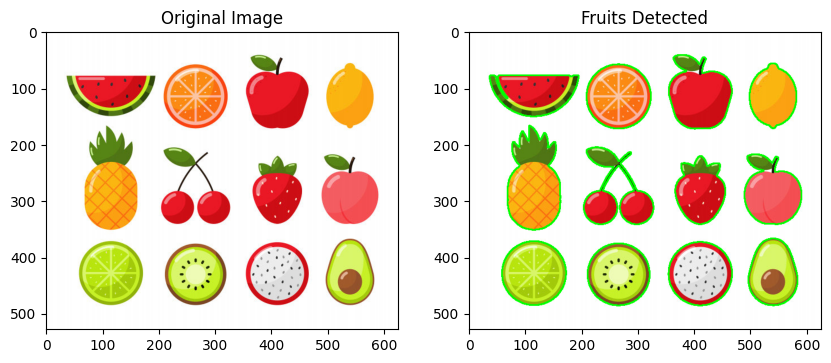

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def count_fruits(image_path):
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        print("Error: Unable to load image.")
        return

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to smooth the image
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Apply binary thresholding to create a mask
    _, thresh = cv2.threshold(blurred, 220, 255, cv2.THRESH_BINARY_INV)

    # Find contours in the thresholded image
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Count the number of objects (fruits)
    fruit_count = len(contours)
    print(f"Number of fruits detected: {fruit_count}")

    # Draw contours on the original image
    result_image = image.copy()
    cv2.drawContours(result_image, contours, -1, (0, 255, 0), 2)

    # Display the original and result images
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    plt.subplot(1, 2, 2)
    plt.title("Fruits Detected")
    plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))

    plt.show()

# Example usage:
image_path = '/content/fr.jpg'  # Replace with the path to your image
count_fruits(image_path)


## 3.Counting the number of insects “CountingInsects(Task)”

Number of insects detected: 64


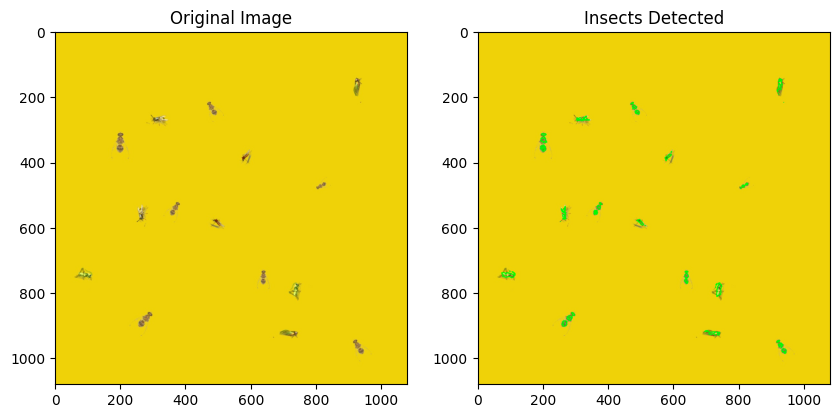

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def count_insects(image_path):
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        print("Error: Unable to load image.")
        return

    # Convert the image to the HSV color space
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define the yellow color range for masking
    lower_yellow = np.array([20, 100, 100])
    upper_yellow = np.array([30, 255, 255])

    # Mask the yellow background to focus on the insects
    mask = cv2.inRange(hsv, lower_yellow, upper_yellow)
    mask_inv = cv2.bitwise_not(mask)

    # Find contours in the masked image
    contours, _ = cv2.findContours(mask_inv, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Count the number of objects (insects)
    insect_count = len(contours)
    print(f"Number of insects detected: {insect_count}")

    # Draw contours on the original image
    result_image = image.copy()
    cv2.drawContours(result_image, contours, -1, (0, 255, 0), 2)

    # Display the original and result images
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    plt.subplot(1, 2, 2)
    plt.title("Insects Detected")
    plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))

    plt.show()

# Example usage:
image_path = '/content/In.jpg'  # Replace with the path to your image
count_insects(image_path)


## 4.Enhancing the image and generated augmented images “NoiseImage(Task)”

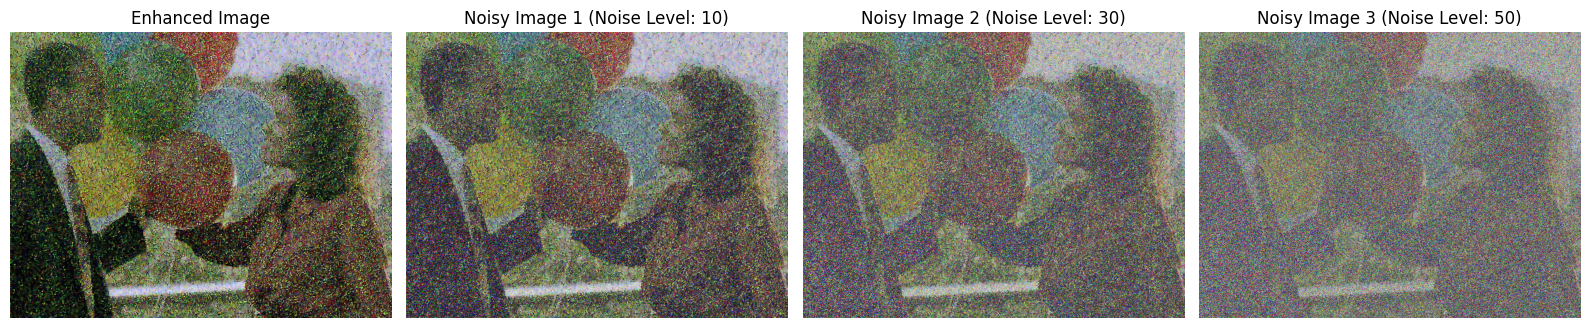

In [ ]:
from PIL import Image, ImageFilter
import numpy as np
import matplotlib.pyplot as plt

# Function to add noise to an image
def add_noise(image, noise_level=30):
    """
    Add random Gaussian noise to an image.
    noise_level controls the intensity of noise.
    """
    image_np = np.array(image)
    noise = np.random.normal(0, noise_level, image_np.shape).astype(np.uint8)
    noisy_image = np.clip(image_np + noise, 0, 255)  # Clip to ensure pixel values are valid
    return Image.fromarray(noisy_image)

# Load the original image
image_path = '/content/ca.jpg'  # Replace with the path to your image
original_image = Image.open(image_path)

# Step 1: Enhance the image by applying a sharpen filter
enhanced_image = original_image.filter(ImageFilter.SHARPEN)

# Step 2: Generate noisy augmented images
noise_levels = [10, 30, 50]  # Different levels of noise to be added
noisy_images = [add_noise(enhanced_image, noise_level) for noise_level in noise_levels]

# Step 3: Display the original enhanced image and noisy images
fig, axes = plt.subplots(1, len(noisy_images) + 1, figsize=(16, 8))

# Display the enhanced image
axes[0].imshow(enhanced_image)
axes[0].set_title('Enhanced Image')
axes[0].axis('off')

# Display noisy images
for i, noisy_img in enumerate(noisy_images):
    axes[i + 1].imshow(noisy_img)
    axes[i + 1].set_title(f'Noisy Image {i+1} (Noise Level: {noise_levels[i]})')
    axes[i + 1].axis('off')

plt.tight_layout()
plt.show()

## 5.Cleaning dataset of spam emails dataset

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import pandas as pd

# Load the Data
file_path = '/content/spam_ham_dataset.csv'
df = pd.read_csv(file_path)

# Display the first few rows
df.head()


,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [ ]:
(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [ ]:
(df.describe(include='all'))


,Unnamed: 0,label,text,label_num
count,5171.000000,5171,5171,5171.000000
unique,NaN,2,4993,NaN
top,NaN,ham,Subject: calpine daily gas nomination\r\n>\r\n...,NaN
freq,NaN,3672,20,NaN
mean,2585.000000,NaN,NaN,0.289886
std,1492.883452,NaN,NaN,0.453753
min,0.000000,NaN,NaN,0.000000
25%,1292.500000,NaN,NaN,0.000000
50%,2585.000000,NaN,NaN,0.000000
75%,3877.500000,NaN,NaN,1.000000


In [ ]:
df.isna().sum()* 100 / len(df)


,0
Unnamed: 0,0.0
label,0.0
text,0.0
label_num,0.0


In [ ]:
print("housing_df duplicated ",df.duplicated().sum())


housing_df duplicated  0


In [ ]:
# Text Analysis
print("Unique Labels in Initial Data:")
print(df['label'].value_counts())



Unique Labels in Initial Data:
label
ham     3672
spam    1499
Name: count, dtype: int64


In [ ]:
print("\nSample Text Data:")
print(df['text'].head())


Sample Text Data:
0    Subject: enron methanol ; meter # : 988291\r\n...
1    Subject: hpl nom for january 9 , 2001\r\n( see...
2    Subject: neon retreat\r\nho ho ho , we ' re ar...
3    Subject: photoshop , windows , office . cheap ...
4    Subject: re : indian springs\r\nthis deal is t...
Name: text, dtype: object


In [ ]:
df = df.drop(columns=['Unnamed: 0'], errors='ignore')  # Remove index column if it exists
df = df.drop_duplicates()  # Remove duplicates
df = df.dropna()  # Handle missing values


In [ ]:
df.columns


Index(['label', 'text', 'label_num'], dtype='object')

In [ ]:
import nltk
nltk.download('punkt')  # Download the 'punkt' tokenizer

# If you also need stopwords, download them as well:
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# Load the dataset
file_path = '/content/spam_ham_dataset.csv'
df = pd.read_csv(file_path)

# Preprocessing function to clean the text
def preprocess_text(text):
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = text.lower()  # Convert to lowercase
    tokens = word_tokenize(text)  # Tokenize the text
    stop_words = set(stopwords.words('english'))  # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    ps = PorterStemmer()  # Apply stemming
    tokens = [ps.stem(word) for word in tokens]
    return ' '.join(tokens)

# Apply text preprocessing to the 'text' column
df['cleaned_text'] = df['text'].apply(preprocess_text)

# Convert cleaned text to numerical features using CountVectorizer (Bag of Words)
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['cleaned_text'])

# Use 'label_num' as the target variable
y = df['label_num']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the training and testing sets
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (4136, 42592)
Testing data shape: (1035, 42592)


In [ ]:
import pandas as pd

# Assuming your dataset has 'email' and 'label' columns
dataset = pd.read_csv('path_to_your_spam_email_dataset.csv')
emails = dataset['email']
labels = dataset['label']  # 1 for spam, 0 for not spam


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


   Unnamed: 0 label                                               text  \
0         605   ham  Subject: enron methanol ; meter # : 988291\r\n...   
1        2349   ham  Subject: hpl nom for january 9 , 2001\r\n( see...   
2        3624   ham  Subject: neon retreat\r\nho ho ho , we ' re ar...   
3        4685  spam  Subject: photoshop , windows , office . cheap ...   
4        2030   ham  Subject: re : indian springs\r\nthis deal is t...   

   label_num  
0          0  
1          0  
2          0  
3          1  
4          0  
Training data shape: (4136, 42592)
Testing data shape: (1035, 42592)


## New

In [ ]:
import pandas as pd

# Load the dataset
data_path = "/content/spam_ham_dataset.csv"
df = pd.read_csv(data_path)



In [ ]:
(df.head())


,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [ ]:
(df.columns)

Index(['Unnamed: 0', 'label', 'text', 'label_num'], dtype='object')

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

def bag_of_words(df):
    vectorizer = CountVectorizer()
    matrix = vectorizer.fit_transform(df['text'])
    print(vectorizer.get_feature_names_out())
    print(matrix.toarray())

# Example usage:
bag_of_words(df)


['00' '000' '0000' ... 'zzocb' 'zzso' 'zzsyt']
[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

def tfidf(df):
    vectorizer = TfidfVectorizer()
    matrix = vectorizer.fit_transform(df['text'])
    print(vectorizer.get_feature_names_out())
    print(matrix.toarray())

# Example usage:
tfidf(df)


['00' '000' '0000' ... 'zzocb' 'zzso' 'zzsyt']
[[0.09947426 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [ ]:
def ngrams(df):
    vectorizer = CountVectorizer(ngram_range=(2, 2))
    matrix = vectorizer.fit_transform(df['text'])
    print(vectorizer.get_feature_names_out())
    print(matrix.toarray())

# Example usage:
ngrams(df)


['00 00' '00 000' '00 01' ... 'zzocb lnjoq' 'zzso 02' 'zzsyt sudlz']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
def char_level_features(df):
    vectorizer = CountVectorizer(analyzer='char')
    matrix = vectorizer.fit_transform(df['text'])
    print(vectorizer.get_feature_names_out())
    print(matrix.toarray())

# Example usage:
char_level_features(df)


['\x01' '\x05' '\x07' '\x0f' '\x11' '\x12' '\x13' '\x14' '\x16' '\x1b' ' '
 '!' '"' '#' '$' '%' '&' "'" '(' ')' '*' '+' ',' '-' '.' '/' '0' '1' '2'
 '3' '4' '5' '6' '7' '8' '9' ':' ';' '<' '=' '>' '?' '@' '[' '\\' ']' '^'
 '_' '`' 'a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o' 'p'
 'q' 'r' 's' 't' 'u' 'v' 'w' 'x' 'y' 'z' '{' '|' '}' '~']
[[0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
import nltk
from nltk import word_tokenize, pos_tag
from sklearn.feature_extraction.text import CountVectorizer

# Download necessary resources
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

def pos_tagging(df):
    def extract_pos_features(text):
        tokens = word_tokenize(text)
        pos_tags = pos_tag(tokens)
        return ' '.join([tag for word, tag in pos_tags])

    pos_features = [extract_pos_features(text) for text in df['text']]
    vectorizer = CountVectorizer()
    matrix = vectorizer.fit_transform(pos_features)
    print(vectorizer.get_feature_names_out())
    print(matrix.toarray())

# Example usage:
pos_tagging(df)


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['cc' 'cd' 'dt' 'ex' 'fw' 'in' 'jj' 'jjr' 'jjs' 'ls' 'md' 'nn' 'nnp'
 'nnps' 'nns' 'pdt' 'pos' 'prp' 'rb' 'rbr' 'rbs' 'rp' 'sym' 'to' 'uh' 'vb'
 'vbd' 'vbg' 'vbn' 'vbp' 'vbz' 'wdt' 'wp' 'wrb']
[[ 1  5  4 ...  0  0  0]
 [ 0  4  0 ...  0  0  0]
 [23 11 48 ...  2  4  2]
 ...
 [ 2 11  3 ...  0  0  0]
 [ 3  8  9 ...  0  0  0]
 [ 5  3 11 ...  0  0  0]]


In [ ]:
def lexical_features(df):
    def extract_lexical_features(text):
        words = word_tokenize(text)
        common_words = ["free", "buy", "click", "now"]
        return ' '.join([word for word in words if word in common_words])

    lexical_features = [extract_lexical_features(text) for text in df['text']]
    vectorizer = CountVectorizer()
    matrix = vectorizer.fit_transform(lexical_features)
    print(vectorizer.get_feature_names_out())
    print(matrix.toarray())

# Example usage:
lexical_features(df)


['buy' 'click' 'free' 'now']
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 1]
 ...
 [0 0 0 0]
 [0 0 0 0]
 [0 1 0 0]]


In [ ]:
import nltk
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download necessary resources
nltk.download('vader_lexicon')

def sentiment_analysis(df):
    sia = SentimentIntensityAnalyzer()
    sentiment_scores = [sia.polarity_scores(text) for text in df['text']]
    sentiment_features = pd.DataFrame(sentiment_scores)
    print(sentiment_features)

# Example usage:
sentiment_analysis(df)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


        neg    neu    pos  compound
0     0.000  0.953  0.047    0.3182
1     0.000  1.000  0.000    0.0000
2     0.026  0.831  0.143    0.9959
3     0.095  0.720  0.186    0.5859
4     0.000  0.960  0.040    0.3400
...     ...    ...    ...       ...
5166  0.000  0.961  0.039    0.4404
5167  0.000  0.972  0.028    0.6486
5168  0.045  0.860  0.094    0.4588
5169  0.047  0.953  0.000   -0.3818
5170  0.071  0.789  0.140    0.8857

[5171 rows x 4 columns]


In [ ]:
tfidf(df)


['00' '000' '0000' ... 'zzocb' 'zzso' 'zzsyt']
[[0.09947426 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [ ]:
import nltk
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download necessary resources
nltk.download('vader_lexicon')

def sentiment_analysis(df, output_file):
    # Initialize the SentimentIntensityAnalyzer
    sia = SentimentIntensityAnalyzer()

    # Get sentiment scores for each text
    sentiment_scores = [sia.polarity_scores(text) for text in df['text']]

    # Create a DataFrame from sentiment scores
    sentiment_features = pd.DataFrame(sentiment_scores)

    # Save the DataFrame to an Excel file
    sentiment_features.to_excel(output_file, index=False)
    print(f"Sentiment analysis results saved to {output_file}")

# Example usage
# Replace 'sentiment_analysis_results.xlsx' with your desired file path
sentiment_analysis(df, 'sentiment_analysis_results.xlsx')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Sentiment analysis results saved to sentiment_analysis_results.xlsx


In [ ]:
import nltk
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download necessary resources
nltk.download('vader_lexicon')

def sentiment_analysis(df, output_file):
    # Initialize the SentimentIntensityAnalyzer
    sia = SentimentIntensityAnalyzer()

    # Get sentiment scores for each text
    sentiment_scores = [sia.polarity_scores(text) for text in df['text']]

    # Create a DataFrame from sentiment scores
    sentiment_features = pd.DataFrame(sentiment_scores)

    # Save the DataFrame to a CSV file
    sentiment_features.to_csv(output_file, index=False)
    print(f"Sentiment analysis results saved to {output_file}")

# Example usage
# Replace 'sentiment_analysis_results.csv' with your desired file path
sentiment_analysis(df, 'sentiment_analysis_results.csv')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Sentiment analysis results saved to sentiment_analysis_results.csv


In [ ]:
import pandas as pd
import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download necessary NLTK resources
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('vader_lexicon')

# Define feature extraction functions
def bag_of_words(data):
    vectorizer = CountVectorizer()
    matrix = vectorizer.fit_transform(data)
    return pd.DataFrame(matrix.toarray(), columns=vectorizer.get_feature_names_out())

def tfidf(data):
    vectorizer = TfidfVectorizer()
    matrix = vectorizer.fit_transform(data)
    return pd.DataFrame(matrix.toarray(), columns=vectorizer.get_feature_names_out())

def ngrams(data):
    vectorizer = CountVectorizer(ngram_range=(2, 2))
    matrix = vectorizer.fit_transform(data)
    return pd.DataFrame(matrix.toarray(), columns=vectorizer.get_feature_names_out())

def char_level_features(data):
    vectorizer = CountVectorizer(analyzer='char')
    matrix = vectorizer.fit_transform(data)
    return pd.DataFrame(matrix.toarray(), columns=vectorizer.get_feature_names_out())

def pos_tagging(data):
    def extract_pos_features(text):
        tokens = word_tokenize(text)
        pos_tags = pos_tag(tokens)
        return ' '.join([tag for word, tag in pos_tags])

    pos_features = [extract_pos_features(text) for text in data]
    vectorizer = CountVectorizer()
    matrix = vectorizer.fit_transform(pos_features)
    return pd.DataFrame(matrix.toarray(), columns=vectorizer.get_feature_names_out())

def lexical_features(data):
    def extract_lexical_features(text):
        words = word_tokenize(text)
        common_words = ["free", "buy", "click", "now"]
        return ' '.join([word for word in words if word in common_words])

    lexical_features = [extract_lexical_features(text) for text in data]
    vectorizer = CountVectorizer()
    matrix = vectorizer.fit_transform(lexical_features)
    return pd.DataFrame(matrix.toarray(), columns=vectorizer.get_feature_names_out())

def sentiment_analysis(data):
    sia = SentimentIntensityAnalyzer()
    sentiment_scores = [sia.polarity_scores(text) for text in data]
    return pd.DataFrame(sentiment_scores)

def save_features_to_csv(df, output_file):
    # Extract features
    bow_features = bag_of_words(df['text'])
    tfidf_features = tfidf(df['text'])
    ngram_features = ngrams(df['text'])
    char_features = char_level_features(df['text'])
    pos_features = pos_tagging(df['text'])
    lexical_features_df = lexical_features(df['text'])
    sentiment_features = sentiment_analysis(df['text'])

    # Combine all features into one DataFrame
    all_features = pd.concat([
        bow_features,
        tfidf_features,
        ngram_features,
        char_features,
        pos_features,
        lexical_features_df,
        sentiment_features
    ], axis=1)

    # Save the combined DataFrame to a CSV file
    all_features.to_csv(output_file, index=False)
    print(f"All feature extraction results saved to {output_file}")

# Example usage
# Replace 'all_features.csv' with your desired file path
save_features_to_csv(df, 'all_features.csv')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
import pandas as pd

# Load the provided dataset
file_path = '/content/spam_dataset.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
df.head()


,Unnamed: 0,label,text,label_num
0,605,ham,subject enron methanol meter 988291 follow not...,0
1,2349,ham,subject hpl nom januari 9 2001 see attach file...,0
2,3624,ham,subject neon retreat ho ho ho around wonder ti...,0
3,4685,spam,subject photoshop window offic cheap main tren...,1
4,2030,ham,subject indian spring deal book teco pvr reven...,0


In [ ]:
# Define function to extract features
import string
import re

def extract_features(text):
    features = {}
    features['word_count'] = len(text.split())  # Word count
    features['char_count'] = len(text)  # Character count
    features['special_char_count'] = sum(1 for char in text if char in string.punctuation)  # Special character count
    features['num_links'] = len(re.findall(r'http[s]?://\S+', text))  # Count of hyperlinks
    features['spammy_word_count'] = sum(1 for word in ['free', 'win', 'money', 'offer'] if word in text.lower())  # Spammy words
    return features

# Apply the feature extraction function to the 'text' column
df_features = df['text'].apply(extract_features)
df_features = pd.DataFrame(df_features.tolist())

# Combine the original dataset with the extracted features
df_final = pd.concat([df, df_features], axis=1)

# Display the first few rows of the updated dataset
df_final.head()


,Unnamed: 0,label,text,label_num,word_count,char_count,special_char_count,num_links,spammy_word_count
0,605,ham,subject enron methanol meter 988291 follow not...,0,35,212,0,0,0
1,2349,ham,subject hpl nom januari 9 2001 see attach file...,0,15,72,0,0,0
2,3624,ham,subject neon retreat ho ho ho around wonder ti...,0,220,1286,0,0,0
3,4685,spam,subject photoshop window offic cheap main tren...,1,44,342,0,0,1
4,2030,ham,subject indian spring deal book teco pvr reven...,0,29,173,0,0,0


In [ ]:
import pandas as pd
import string
import re

# Load your spam dataset
df = pd.read_csv("/content/spam_dataset.csv")

# Define a function to extract features from the email text
def extract_features(text):
    features = {}
    features['word_count'] = len(text.split())  # Word count
    features['char_count'] = len(text)  # Character count
    features['special_char_count'] = sum(1 for char in text if char in string.punctuation)  # Special character count
    features['num_links'] = len(re.findall(r'http[s]?://\S+', text))  # Count of hyperlinks
    # Count of common spammy words
    spammy_words = ['free', 'win', 'money', 'offer', 'click', 'urgent']
    features['spammy_word_count'] = sum(1 for word in spammy_words if word in text.lower())
    return features

# Apply the feature extraction function to the 'text' column of the dataset
df_features = df['text'].apply(extract_features)
df_features = pd.DataFrame(df_features.tolist())

# Combine the original dataset with the extracted features
df_final = pd.concat([df, df_features], axis=1)

# Display the first few rows of the updated dataset
print(df_final.head())

# Save the extracted features to a new CSV file
df_final.to_csv('spam_features.csv', index=False)


   Unnamed: 0 label                                               text  \
0         605   ham  subject enron methanol meter 988291 follow not...   
1        2349   ham  subject hpl nom januari 9 2001 see attach file...   
2        3624   ham  subject neon retreat ho ho ho around wonder ti...   
3        4685  spam  subject photoshop window offic cheap main tren...   
4        2030   ham  subject indian spring deal book teco pvr reven...   

   label_num  word_count  char_count  special_char_count  num_links  \
0          0          35         212                   0          0   
1          0          15          72                   0          0   
2          0         220        1286                   0          0   
3          1          44         342                   0          0   
4          0          29         173                   0          0   

   spammy_word_count  
0                  0  
1                  0  
2                  0  
3                  1  
4            

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download stopwords and WordNet data
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# ========== Data Preprocessing ==========

# Sample data: Replace this with your actual dataset
# Example: df = pd.read_csv('spam_emails.csv')
data = {
    'email': [
        "Congratulations! You've won a $1000 Walmart gift card. Click here to claim now.",
        "Hi John, I hope you're doing well. I wanted to catch up soon.",
        "Win a free iPhone by entering this contest! Don't miss out."
    ],
    'label': [1, 0, 1]  # 1 for spam, 0 for non-spam
}

df = pd.DataFrame(data)

# Preprocessing function
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove punctuation, digits, and special characters
    text = re.sub(r'[^a-z\s]', '', text)

    # Tokenize and remove stopwords
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]

    # Join tokens back into a string
    text = ' '.join(tokens)
    return text

# Apply preprocessing to the 'email' column
df['processed_email'] = df['email'].apply(preprocess_text)

# ========== Feature Extraction ==========

# 1. Bag of Words (Count Vectorizer)
vectorizer = CountVectorizer()
X_bow = vectorizer.fit_transform(df['processed_email'])

# Convert to DataFrame for easy visualization
bow_features = pd.DataFrame(X_bow.toarray(), columns=vectorizer.get_feature_names_out())

print("Bag of Words Features:")
print(bow_features)

# 2. TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['processed_email'])

# Convert to DataFrame for easy visualization
tfidf_features = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

print("\nTF-IDF Features:")
print(tfidf_features)

# 3. Additional Features (word count, character count)
df['word_count'] = df['processed_email'].apply(lambda x: len(x.split()))
df['char_count'] = df['processed_email'].apply(lambda x: len(x))

print("\nAdditional Features (Word and Character Counts):")
print(df[['processed_email', 'word_count', 'char_count']])

# You can combine all features into a single DataFrame
combined_features = pd.concat([bow_features, df[['word_count', 'char_count']]], axis=1)
print("\nCombined Features:")
print(combined_features)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Bag of Words Features:
   card  catch  claim  click  congratulation  contest  dont  entering  free  \
0     1      0      1      1               1        0     0         0     0   
1     0      1      0      0               0        0     0         0     0   
2     0      0      0      0               0        1     1         1     1   

   gift  ...  iphone  john  miss  soon  walmart  wanted  well  win  youre  \
0     1  ...       0     0     0     0        1       0     0    0      0   
1     0  ...       0     1     0     1        0       1     1    0      1   
2     0  ...       1     0     1     0        0       0     0    1      0   

   youve  
0      1  
1      0  
2      0  

[3 rows x 22 columns]

TF-IDF Features:
       card     catch     claim     click  congratulation   contest      dont  \
0  0.377964  0.000000  0.377964  0.377964        0.377964  0.000000  0.000000   
1  0.000000  0.353553  0.000000  0.000000        0.000000  0.000000  0.000000   
2  0.000000  0.000000  

In [ ]:
# Save the combined features to a CSV file
combined_features.to_csv('spam_email_features.csv', index=False)

print("\nCombined Features saved to 'spam_email_features.csv'")



Combined Features saved to 'spam_email_features.csv'


In [ ]:
import pandas as pd
import re
import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download stopwords and WordNet data
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# ========== Data Preprocessing ==========

# Load the dataset from the CSV file
df = pd.read_csv('/content/spam_dataset.csv')

# Preprocessing function
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove punctuation, digits, and special characters
    text = re.sub(r'[^a-z\s]', '', text)

    # Tokenize and remove stopwords
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]

    # Join tokens back into a string
    text = ' '.join(tokens)
    return text

# Apply preprocessing to the 'text' column (email content)
df['processed_text'] = df['text'].apply(preprocess_text)

# ========== Feature Extraction ==========

# 1. Bag of Words (Count Vectorizer)
vectorizer = CountVectorizer()
X_bow = vectorizer.fit_transform(df['processed_text'])

# Convert to DataFrame for easy visualization
bow_features = pd.DataFrame(X_bow.toarray(), columns=vectorizer.get_feature_names_out())

# 2. TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['processed_text'])

# Convert to DataFrame for easy visualization
tfidf_features = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# 3. Additional Features (word count, character count)
df['word_count'] = df['processed_text'].apply(lambda x: len(x.split()))
df['char_count'] = df['processed_text'].apply(lambda x: len(x))

# Combine all features into a single DataFrame
combined_features = pd.concat([bow_features, df[['word_count', 'char_count', 'label_num']]], axis=1)

# Save combined features to a CSV file
combined_features.to_csv('/content/spam_email_features.csv', index=False)

print("Combined Features saved to '/content/spam_email_features.csv'")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Combined Features saved to '/content/spam_email_features.csv'
